In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [47]:
a_file = open("../data/stopwords.txt", "r")
stopwords = []

for line in a_file:
    
    stripped_line = line.strip()

    stopwords.append(stripped_line)


a_file.close()


print(stopwords)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estav

In [46]:
olist = pd.read_csv("../data/olist/olist_order_reviews_dataset.csv")
olist.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
order = pd.read_csv("../data/olist/order_id.csv")
order = list(order["order_id"])

In [11]:
len(order)

98

In [12]:
olist.shape

(100000, 7)

In [13]:
olist["review_comment_message"].isna().sum()

58247

In [14]:
olist["review_score"].isna().sum()

0

In [24]:
empresa = olist[olist["order_id"].isin(order)]
empresa.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2324,28983631affcc1f633e6a5b04ee723ab,783b1d8d1782290b10a4d8633721e26f,5,super,muito bom,2018-08-29 00:00:00,2018-08-30 01:16:29
2921,6f671312864e5497af70e8ac10fb43a1,1f210038c217da04d2d88a6a59614f6a,5,Entrega muito rápida,Ainda não utilizei o produto então não posso o...,2018-05-12 00:00:00,2018-05-13 01:34:16
4374,0bf7ad18eb70f3d5848020533b5ec54e,e639ca87d2005d88adaad8431a8016e9,3,NaN,NaN,2018-04-12 00:00:00,2018-04-19 11:05:35
4980,02ed4b7fcf2a010c1bcb20ef25c20460,20cea985bb2eb263b7abb5b2589a3f32,4,NaN,NaN,2018-04-20 00:00:00,2018-04-26 01:48:42
10976,9a2096caa50485029422dd8aa5162c19,93946756257ca00a0bd35bf9e162718e,5,NaN,NaN,2018-06-14 00:00:00,2018-06-16 20:36:44


In [25]:
#média do score geral
empresa["review_score"].mean()

4.428571428571429

In [26]:
empresa["review_comment_message"].isna().sum()

46

In [27]:
empresa_comment = empresa.dropna(subset=['review_comment_message'])
empresa_comment.shape

(31, 7)

In [28]:
empresa_bad_comment = empresa_comment[empresa_comment["review_score"] <= 3]
empresa_good_comment = empresa_comment[empresa_comment["review_score"] > 3]

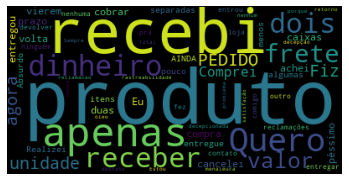

In [48]:
wordcloud2 = WordCloud(stopwords = stopwords).generate(' '.join(empresa_bad_comment['review_comment_message']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

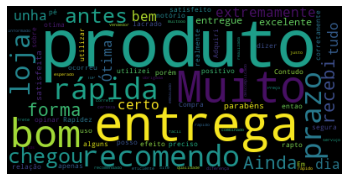

In [49]:
wordcloud2 = WordCloud(stopwords = stopwords).generate(' '.join(empresa_good_comment['review_comment_message']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [39]:
empresa['review_creation_date']= pd.to_datetime(empresa['review_creation_date']) 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
empresa.sort_values(by=["review_score","review_creation_date"], ascending=False, inplace=True)

In [60]:
empresa.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
97085,2a81cd71cd0250fbb908534cdf7763c7,133a123493a55f389917093bd41fb184,5,NaN,NaN,2018-08-30,2018-08-30 03:20:04
2324,28983631affcc1f633e6a5b04ee723ab,783b1d8d1782290b10a4d8633721e26f,5,super,muito bom,2018-08-29,2018-08-30 01:16:29
59081,dd7ad46e529dee82ac30a6f2561e0aa3,159b0ce7faa02427505f3ce47f48e933,5,recomendo,Ótima loja e produtos,2018-08-29,2018-08-29 11:31:04
39090,b17efc098ea1e37e65cae9150c2f0275,1d54af1bf3179b54f046212de28f8bc7,5,*****,otima,2018-08-18,2018-08-23 10:19:29
74619,635b498c97e573f64911343026d14018,00ab3a43bda739029ffce95d3b2fb56c,5,Otimo,Produto de excelente qualidade.,2018-08-15,2018-08-16 17:16:04
